# Dinamika konstrukcija
## Vježbe 4: Modalna analiza u programskome jeziku Python za prisilne neprigušene oscilacije sistema s više stupnjeva slobode 
### Sveučilišni diplomski - Ljetni semestar akademske godine 2020/2021

Predavač: Ivan Hlača;
email: ivan.hlaca@uniri.hr;
soba G-338

#### Rubni uvjeti - nastavak Vjezbi 3

Parametri gibanja **slobodnog** neprigušenog sistema s više stupnjeva slobode se izračunaju uvrštavanjem rubnih uvjeta $u_0$ i $v_0$ u sljedeće jednadžbe:

$$ A = \Phi^{-1} u_0 \tag{1}$$
$$ B = \Omega^{-1} \Phi^{-1} v_0 \tag{2}$$

Traženje inverza matrice $\Phi$ je računalno zahtjevna operacija. Množenjem jednadžbi slijeva s $\Phi^T m$ izvedu se sljedeći izrazi:

$$ A_i = \frac{\phi_i^T m u_0} {M_i} = q_n(0) \tag{3}$$
$$ B_i = \frac{\phi_i^T m v_0} {\omega_i M_i} = \dot{q_n}(0) \tag{4}$$

koji su u matričnom obliku prije pojednostavljenja glasili:

$$ A = M^{-1} \Phi^T m u_0 \tag{5}$$
$$ B = \Omega^{-1} M^{-1} \Phi^T m v_0 \tag{6}$$

gdje je $\Omega$ spektralna matrica, $\Phi$ modalna matrica, a dijagonalna matrica masa $M=\phi^T m \phi$. 
Inverz dijagonalne matrice s dijagonalnim članovima $M_i$ je jednostavno pronaći:

$$ M = 
\begin{bmatrix}
M_1 & 0\\
0 & M_2
\end{bmatrix}$$

$$ M^{-1} = 
\begin{bmatrix}
1/M_1 & 0\\
0 & 1/M_2
\end{bmatrix}$$

#### Primjer 2.

Razmatra se primjer Example 10.11 iz knjige Dynamics of Structures (Chopra) koji se nastavlja na Primjer 1. (Example 10.4).

<img src="https://raw.githubusercontent.com/Ivan768/Dinamika-konstrukcija/main/Primjer_10_4.png">

Dani su sljedeći rubni uvjeti:
$u(t=0) = 
\begin{bmatrix}
-0.5 \\
2 
\end{bmatrix}$

In [1]:
#import modula
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh

In [2]:
#ponavljanje postupka s Vjezbi 3
m = 50000. #masa u primjeru
k = 112500. #krutost u primjeru
m_matrica = m * np.array([[2,0],[0,1]])
k_matrica = k * np.array([[3,-1],[-1,1]])

w , v = eigh(k_matrica,m_matrica)

In [3]:
#vlastite frekvencije
omega = np.sqrt(w)
spektralna = np.diag(omega) #diag za dijagonalnu matricu

In [4]:
#vlastiti oblici
phi_1 = v[:,0]/v[1,0] 
phi_2 = v[:,1]/v[1,1]

modalna = np.array([phi_1,phi_2]).T 

In [5]:
#rubni uvjeti
u0 = np.array([-0.5,2])
v0 = np.array([0,0]) #brzina nije zadana jer brzine nema v0=0

##### Uvrštavanje rubnih uvjeta na 1. način - izravno iz jednadžbi (1) & (2)

$$ A = \Phi^{-1} u_0 \tag{1}$$
$$ B = \Omega^{-1} \Phi^{-1} v_0 \tag{2}$$

In [6]:
spektralna_inv = np.linalg.inv(spektralna)
modalna_inv = np.linalg.inv(modalna)

In [7]:
A = modalna_inv.dot(u0)
B = np.dot(spektralna_inv,modalna_inv).dot(v0)
print(A,B)

[1. 1.] [0. 0.]


##### Uvrštavanje rubnih uvjeta na 2. način - iz jednadžbi (3) & (4)

$$ A_i = \frac{\phi_i^T m u_0} {M_i} = q_n(0) \tag{3}$$
$$ B_i = \frac{\phi_i^T m v_0} {\omega_i M_i} = \dot{q_n}(0) \tag{4}$$

In [8]:
M = np.dot(modalna.T,m_matrica).dot(modalna)
M #dijagonalna matrica

array([[ 75000.,      0.],
       [     0., 150000.]])

In [9]:
n = 2 #broj stupnjeva slobode
A = np.zeros(n) #inicijalizacija
B = np.zeros(n) #inicijalizacija
for i in range(n):
    A[i] = np.linalg.multi_dot([modalna[:,i].T, m_matrica, u0]) / M[i,i]
    B[i] = np.linalg.multi_dot([modalna[:,i].T, m_matrica, v0]) / (omega[i]*M[i,i])
print(A,B)

[1. 1.] [0. 0.]


#### Rješenje pomaka (transformacija iz modalnih u stvarne koordinate)

$$ u = \Phi q \tag{1}$$

$$ u = \Phi (A \cos{\omega t} + B \sin{\omega t}) \tag{2}$$

$$ u_i  = \sum_{i=1}^{n} \phi_i (A_i \cos \omega_i t + B_i \sin \omega_i t) \tag{3}$$

Koristiti će se izraz (2) za dobivanje pomaka tj. za transformaciju iz modalnih u stvarne koordinate:

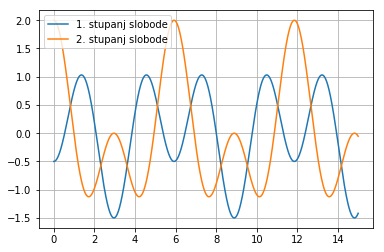

In [10]:
def pomaci(t):
    zagrada = A*(np.cos(omega*t)) + B*(np.sin(omega*t))
    u = modalna.dot(zagrada)
    return u

vrijeme = np.arange(0,15,0.01)
pomak_1 = np.zeros(len(vrijeme)) #inicijalizacija
pomak_2 = np.zeros(len(vrijeme)) #inicijalizacija
for i,j in enumerate(vrijeme): #ukljuciti red ispod za razumijevanje enumerate
    #print(i,j) #test
    pomak_1[i] = pomaci(j)[0]
    pomak_2[i] = pomaci(j)[1]
    
plt.plot(vrijeme,pomak_1,label='1. stupanj slobode')
plt.plot(vrijeme,pomak_2,label='2. stupanj slobode')
plt.legend()
plt.grid()
plt.show()

Alternativno, ako se koristi izraz (3) za dobivanje pomaka tj. za transformaciju iz modalnih u stvarne koordinate:

In [11]:
def pomaci_alternativa(t):
    q = np.zeros(n)
    for i in range(n):
        q[i] = A[i]*np.cos(omega[i]*t)+B[i]*np.sin(omega[i]*t)
    return modalna.dot(q)

In [12]:
pomaci(3) #test

array([-1.49633168, -0.00244511])

In [13]:
pomaci_alternativa(3) #test

array([-1.49633168, -0.00244511])

### Prisilne neprigušene oscilacije sistema s više stupnjeva slobode 

U jednadžbe gibanja se uvodi poremećajna sila $f(t)$:

$$m \ddot u + k u = f(t) \tag{1}$$

Ranije objašnjeni postupci za slobodne neprigušene oscilacije s više stupnjeva slobode se provode i za ovaj problem:
- iz determinante se pronađu vlastite vrijednosti $\omega_i$
- iz vlastitih vrijednosti se izračunaju vlastiti oblici $\phi$ (ova dva koraka se naprave naredbom *eigh*)
- iz početnih uvjeta se dobiju konstante $A,B$ koje se pojavljuju u izrazu za $q$

Jednadžba (1) se u modalnim koordinatama može napisati na sljedeći način:

$$ M \ddot q + K q = F(t) \tag{2}$$

gdje je $F(t)= \Phi^T f(t)$.

**Kada je poremećajna sila $f(t) = f_0 \sin \Omega t$ tj. harmonijska funkcija i kad djeluje na samo jedan od više stupnjeva slobode (kao u Primjeru 3. ispod), onda je rješenje jednadžbe (2) u modalnim koordinatama:**

$$ q_i(t) = A \cos \omega_i t + B \sin \omega_i t + 
\frac{\Phi_{ik} f_0 / K_i}{1-(\Omega/\omega_i)^2} (\sin \Omega t - \frac{\Omega}{\omega_i} \sin \omega_i t) \tag{3}$$


gdje se prva dva člana zovu homogenim dijelom rješenja (poznato iz dosad obrađenog gradiva), a zadnji član se zove partikularno rješenje. Opći izraz za partikularno rješenje (kada poremećajne sile djeluju na više stupnjeva slobode) je sličan gornjem, ali se radi o sumi takvih članova:

$$ q_{i,partikularno}(t) = \sum_{j=1}^{n} \frac{\Phi_{ij} f_{0j} / K_i}{1-(\Omega_{j}/\omega_i)^2} (\sin \Omega_{j} t - \frac{\Omega_j}{\omega_i} \sin \omega_i t) \tag{4}$$

#### Primjer 3.

Razmatra se primjer Example 12.1 iz knjige Dynamics of Structures (Chopra) koji se nastavlja na Primjer 1. i Primjer 2. (Example 10.4 & 10.11).   

<img src="https://raw.githubusercontent.com/Ivan768/Dinamika-konstrukcija/main/Primjer_12_1.png">

In [14]:
#ranije su zadani ulazni parametri m i k te njihove matrice

Poremećajna sila $f(t) = f_0 \sin{\Omega t} $ je prikazana u nastavku.

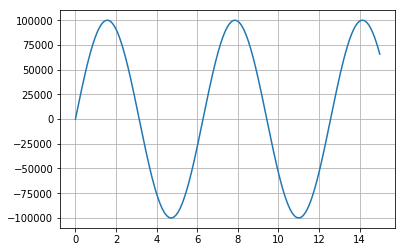

In [15]:
f0 = 10**5 #amplituda poremećajne sile
omega_pobude = 1.0 # 2pi / period pobude; PAZI ista oznaka kao spektralna matrica
def sila(t):
    return f0*np.sin(omega_pobude*t)
vrijeme = np.arange(0,15,0.01)
plt.plot(vrijeme,sila(vrijeme))
plt.grid()

In [16]:
K = np.dot(modalna.T,k_matrica).dot(modalna)
K #dijagonalna matrica

array([[ 8.43750000e+04, -2.18278728e-11],
       [-5.82076609e-11,  6.75000000e+05]])

Definiranje funkcije *q(t)* u kodu ispod prema jednadžbi (3) je zahtjevno jer postoji puno prilika za napraviti grešku i onda je često nije lako pronaći. Homogeni dio rješenja je ranije definiran funkcijom *pomaci_alternativa* pa je taj dio odrađen te ga samo treba preuzeti, ali za partikularni dio rješenja uputno je raditi korak po korak s testiranjem svakog koraka u zasebnoj funkciji. Npr. dio u funkciji koji se odnosi na zagradu je dobro prvo testirati u zasebnoj funkciji *zagrada(t)* koja se onda pozove za neko proizvoljno vrijeme kao $t=3$ kako bi se vidjelo postoji li greška u smislu bug-a ili u smislu nesmislenih rezultata (rješenje bi trebalo imati jednak broj članova broju stupnjeva slobode).

In [17]:
def q(t):
    k = 0 #stupanj slobode na kojem sila djeluje, 0 je prvi stupanj slobode
    n = 2 #broj stupnjeva slobode
    homogeno = np.zeros(n)
    part = np.zeros(n)
    for i in range(n):
        #homogeni dio rjesenja je identican kao u zadnjem zadatku
        homogeno[i] = A[i]*np.cos(omega[i]*t)+B[i]*np.sin(omega[i]*t)
        #partikularni dio rjesenja (3. clan u jedn. 3)
        zagrada = np.sin(omega_pobude*t) - (omega_pobude/omega[i]) * np.sin(omega[i]*t)
        part[i]= ((modalna[i,k]*f0/K[i,i]) / (1-(omega_pobude/omega[i])**2)) * zagrada
    return homogeno+part

In [18]:
spektralna #prikaz vlastitih vrijednosti

array([[1.06066017, 0.        ],
       [0.        , 2.12132034]])

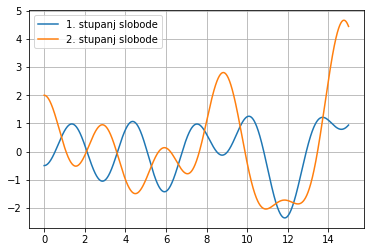

In [19]:
f0 = +10**5
omega_pobude = 1.06 #*2
vrijeme = np.arange(0,15,0.01)
pomak_1 = np.zeros(len(vrijeme)) #inicijalizacija
pomak_2 = np.zeros(len(vrijeme)) #inicijalizacija
for i,j in enumerate(vrijeme):
    pomak_1[i] = modalna.dot(q(j))[0]
    pomak_2[i] = modalna.dot(q(j))[1]
plt.plot(vrijeme,pomak_1,label='1. stupanj slobode')
plt.plot(vrijeme,pomak_2,label='2. stupanj slobode')
plt.legend()
plt.grid()
plt.show()

Isprobati sljedeće na zadnjem inputu:
- promijeniti varijablu vrijeme tj. $t$ kako bi se vidjelo dolazi li kasnije do rezonance
- promijeniti varijablu omega_pobude tj. $\Omega$ kako bi se pronašao II. ton
- promijeniti predznak amplitude f0 tj. $f_0$
- promijeniti mjesto sile tako da se promijeni $k$ u funkciji $q(t)$
- promijeniti početne uvjete odnosno parametre $A,B$
- promijeniti varijablu vrijeme tj. $t$ i varijablu omega_pobude tj. $\Omega$ kako bi se vidjelo dolazi li do podrhtavanja (pulsiranja) kod homogenih početnih uvjeta, period podrhtavanja $T_D/2 = \frac {2\pi} {\Omega - \omega}$... podrhtavanje će se vidjeti za $\Omega=1$, $t=100$

Neki od gornjih primjera se mogu napraviti jednostavno unutar funkcije.   
*def proba(t,omega_pobude,f0):
    ....*

##### Usporedba s rješenjem iz literature za Primjer 3.

Početni uvjeti pomaka $u_0$ i brzine $v_0$ odnosno problem ima tzv. homogene početne uvjete. Za takve početne uvjete će gibanje biti opisano partikularnim dijelom rješenja jer su konstante $A,B$ jednake $0$.

In [20]:
#A = np.array([0.,0.])
#B = np.array([0.,0.])
#vrijeme = np.arange(0,100,1)
#x = np.arange(0,spektralna[0,0]*3,0.01) #domena omega pobude
#y = np.zeros(len(x))
#for i,pobuda in enumerate(x):
#    maks = 0
#    omega_pobude = pobuda
#    for j in vrijeme:
#        pomak_1 = modalna.dot(q(j))[0] 
#        if pomak_1 > maks:
#            maks = pomak_1
#    y[i] = maks
#plt.plot(x,y/(f0/2/k))
#plt.ylim(0,10)
#plt.grid()